# Day2. 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!pip install face_recognition
 

  Using cached https://files.pythonhosted.org/packages/1e/95/f6c9330f54ab07bfa032bf3715c12455a381083125d8880c43cbe76bb3d0/face_recognition-1.3.0-py2.py3-none-any.whl
     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=b07267d0798d9d4d59200b44eb43b2c451290a5f3f820aa09d7ecd2180d572d1
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [52]:
import cv2, os 
import face_recognition as fr 
from IPython.display import Image, display 
from matplotlib import pyplot as plt 

image_path = "/gdrive/My Drive/colab/people.jpg"

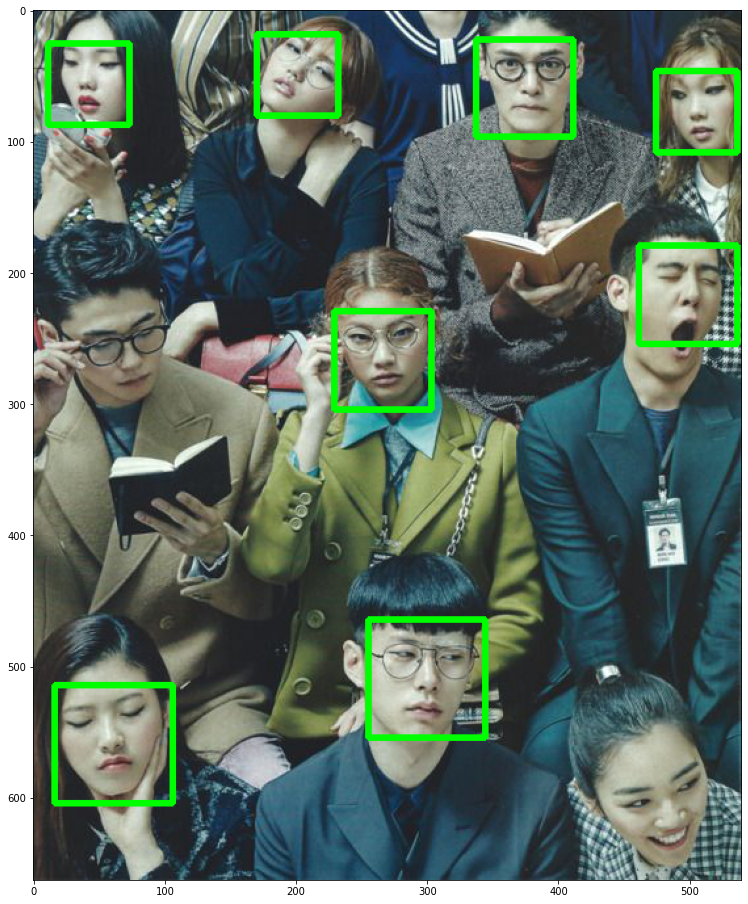

In [53]:
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)
for (top, right, bottom, left) in face_locations :
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)

plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


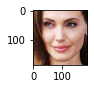

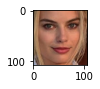

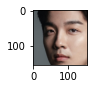

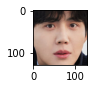

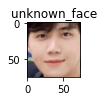

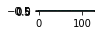

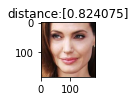

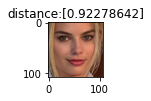

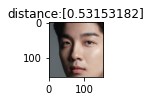

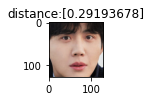

In [64]:
# 동일 인물인지를 찾는 코드
plt.rcParams['figure.figsize'] = (1, 1)

# 이미지 파일을 로드하여 known_person_list 리스트 생성 
known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person1.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person2.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person3.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person4.jpg"))

# 4명의 얼굴을 인식하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list :
  # 얼굴 좌표를 알아내서 잘라낸다.
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  # known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

# 저장된 얼굴 출력해 보기
for face in known_face_list :
  plt.imshow(face)
  plt.show()

# 기존 리스트에 없는 새로운 파일을 열어서
unknown_person = fr.load_image_file("/gdrive/My Drive/colab/unknown.jpg")

#새로운 파일의 얼굴좌표를 알아내서 잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

#unknown_face라는 타이틀을 붙여서 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

# face_encoding() 함수를 이용해 enc_unknown_face에 얼굴 영역을 인코딩
enc_unknown_face = fr.face_encodings(unknown_face)

# 화면에 표시 
plt.imshow(enc_known_face)
plt.show()
# 등록된 얼굴리스트를 비교 (distance 값을 이용해 같은 사람인지 아닌지 구별)
for face in known_face_list :
  # 등록된 얼굴을 128-dimensional face 인코딩 
  enc_known_face = fr.face_encodings(face)
  # 등록된 얼굴과 새로운 얼굴의 distance를 얻기
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  # distance 수치를 포함한 얼굴 출력 
  plt.title("distance:" +str(distance))
  plt.imshow(face)
  plt.show()
